## Python

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.calibration

- Isotonic Regression https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression
- Platt's scaling 

```Python
isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')
sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

```

- Beta Calibration https://pypi.org/project/betacal/
- Dirichlet Calibration https://pypi.org/project/dirichletcal/
- Our Python Calibration Library (PyCaLib)
- NetCal https://pypi.org/project/netcal/
    - includes metrics, reliability diagram and calibration for Neural Nets


## R
    
https://github.com/pakdaman/calibration

In [5]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

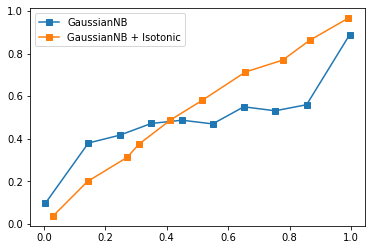

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

est = GaussianNB()
isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)

for clf, name in [(est, 'GaussianNB'),
            (isotonic, 'GaussianNB + Isotonic')]:
    clf.fit(X_train, y_train)
    prob_pos = clf.predict_proba(X_test)[:,1]

    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label=name)
    plt.legend()